<a href="https://colab.research.google.com/github/11muskansingh/Machine-Learning/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import os
import shutil

home_data_for_ml_course_path = kagglehub.competition_download('home-data-for-ml-course')
source = home_data_for_ml_course_path
dest = '../kaggle/'

for file in os.listdir(source):
    shutil.move(os.path.join(source, file), dest)

print('Data source import complete.')

100%|██████████| 386k/386k [00:00<00:00, 767kB/s]

Extracting files...
Data source import complete.


In [3]:

 # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
test_data=pd.read_csv('../kaggle/test.csv')
train_data=pd.read_csv('../kaggle/train.csv')


In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# prompt: check number of null values in each feature and print each col

for col in train_data.columns:
  null_count = train_data[col].isnull().sum()
  print(f"Column: {col}, Null Values: {null_count}")


Column: Id, Null Values: 0
Column: MSSubClass, Null Values: 0
Column: MSZoning, Null Values: 0
Column: LotFrontage, Null Values: 259
Column: LotArea, Null Values: 0
Column: Street, Null Values: 0
Column: Alley, Null Values: 1369
Column: LotShape, Null Values: 0
Column: LandContour, Null Values: 0
Column: Utilities, Null Values: 0
Column: LotConfig, Null Values: 0
Column: LandSlope, Null Values: 0
Column: Neighborhood, Null Values: 0
Column: Condition1, Null Values: 0
Column: Condition2, Null Values: 0
Column: BldgType, Null Values: 0
Column: HouseStyle, Null Values: 0
Column: OverallQual, Null Values: 0
Column: OverallCond, Null Values: 0
Column: YearBuilt, Null Values: 0
Column: YearRemodAdd, Null Values: 0
Column: RoofStyle, Null Values: 0
Column: RoofMatl, Null Values: 0
Column: Exterior1st, Null Values: 0
Column: Exterior2nd, Null Values: 0
Column: MasVnrType, Null Values: 872
Column: MasVnrArea, Null Values: 8
Column: ExterQual, Null Values: 0
Column: ExterCond, Null Values: 0
Col

In [8]:
# prompt: find all categorical and numerical features

categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

# Identify numerical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical features:", categorical_features)
print("\nNumerical features:", numerical_features)


Categorical features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Numerical features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', '

In [9]:
for col in categorical_features:
  print(col, train_data[col].unique())


MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd'

In [10]:
# prompt: ok so give the categorical variables with number of null values

for col in categorical_features:
  null_count = train_data[col].isnull().sum()
  print(f"Categorical Column: {col}, Null Values: {null_count}")

Categorical Column: MSZoning, Null Values: 0
Categorical Column: Street, Null Values: 0
Categorical Column: Alley, Null Values: 1369
Categorical Column: LotShape, Null Values: 0
Categorical Column: LandContour, Null Values: 0
Categorical Column: Utilities, Null Values: 0
Categorical Column: LotConfig, Null Values: 0
Categorical Column: LandSlope, Null Values: 0
Categorical Column: Neighborhood, Null Values: 0
Categorical Column: Condition1, Null Values: 0
Categorical Column: Condition2, Null Values: 0
Categorical Column: BldgType, Null Values: 0
Categorical Column: HouseStyle, Null Values: 0
Categorical Column: RoofStyle, Null Values: 0
Categorical Column: RoofMatl, Null Values: 0
Categorical Column: Exterior1st, Null Values: 0
Categorical Column: Exterior2nd, Null Values: 0
Categorical Column: MasVnrType, Null Values: 872
Categorical Column: ExterQual, Null Values: 0
Categorical Column: ExterCond, Null Values: 0
Categorical Column: Foundation, Null Values: 0
Categorical Column: BsmtQu

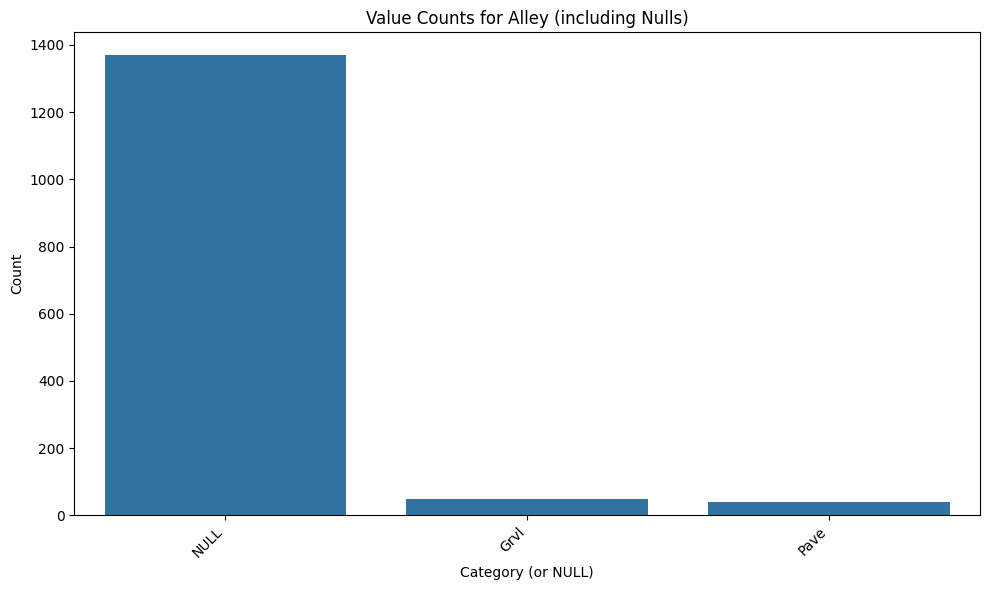

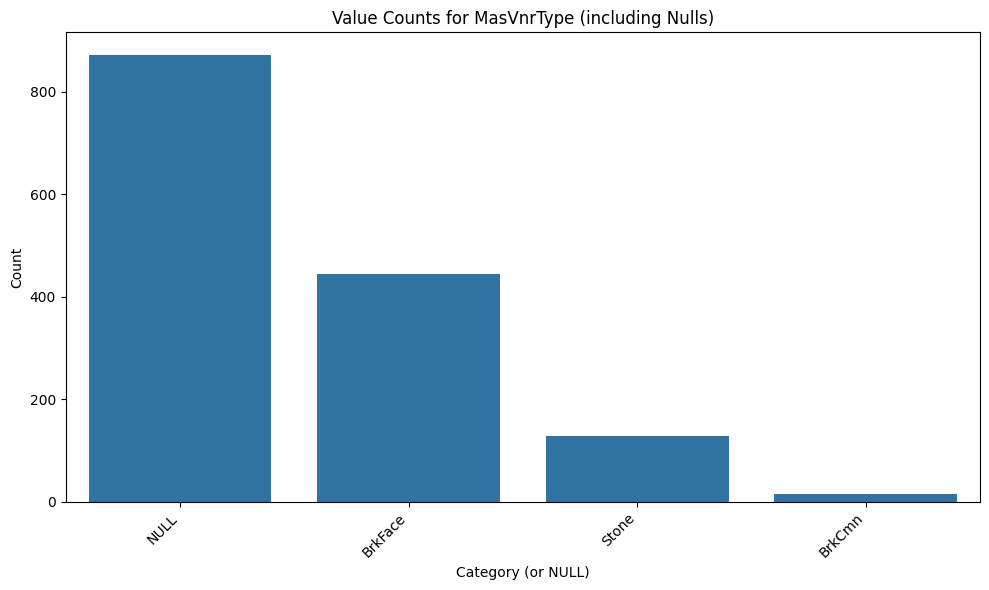

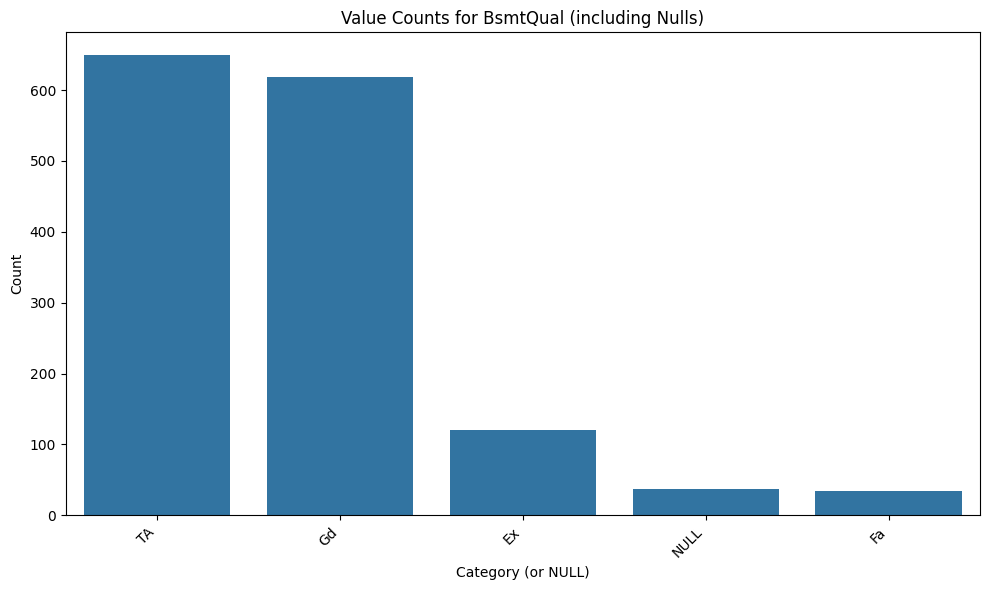

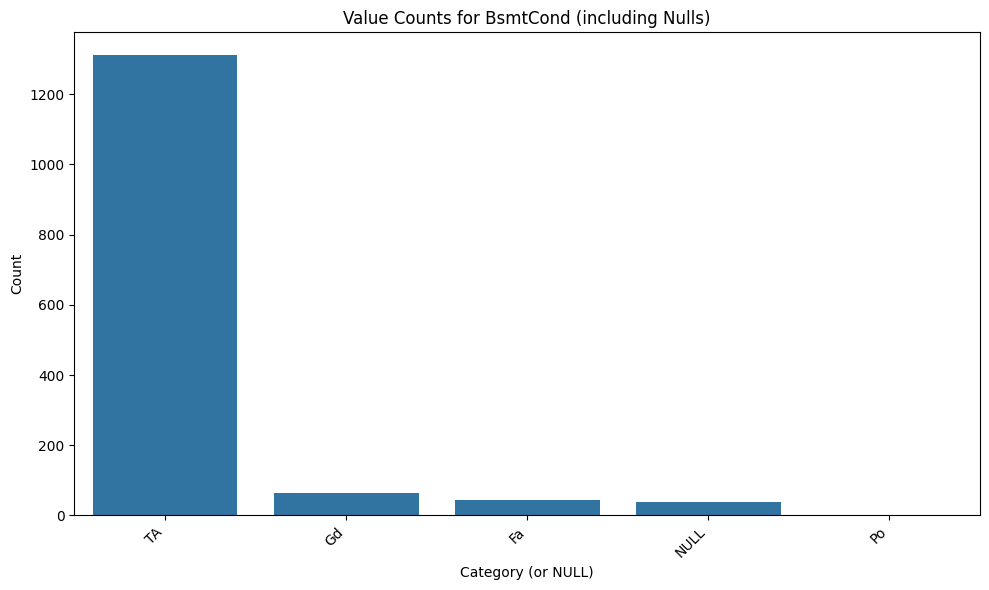

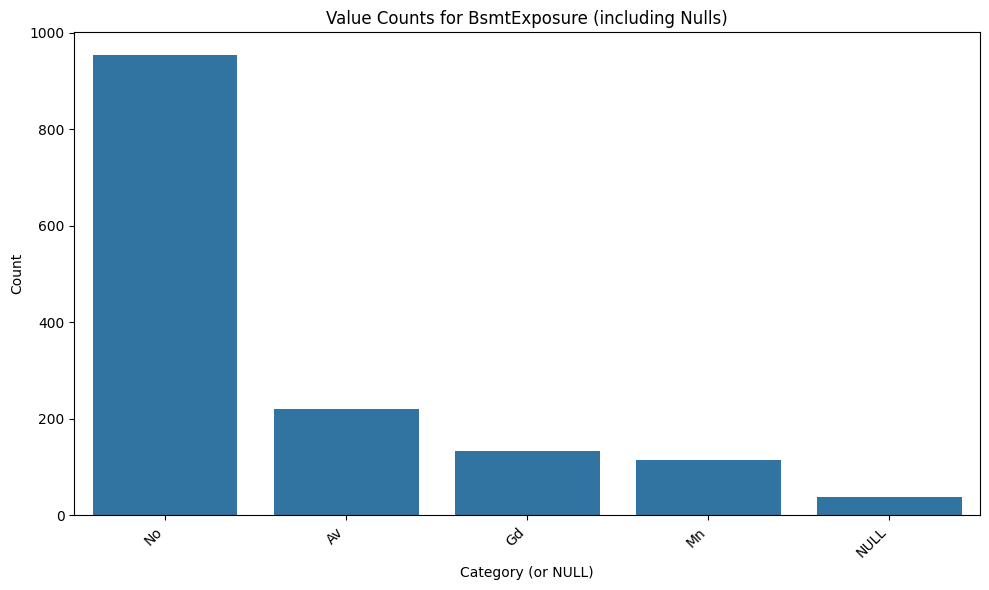

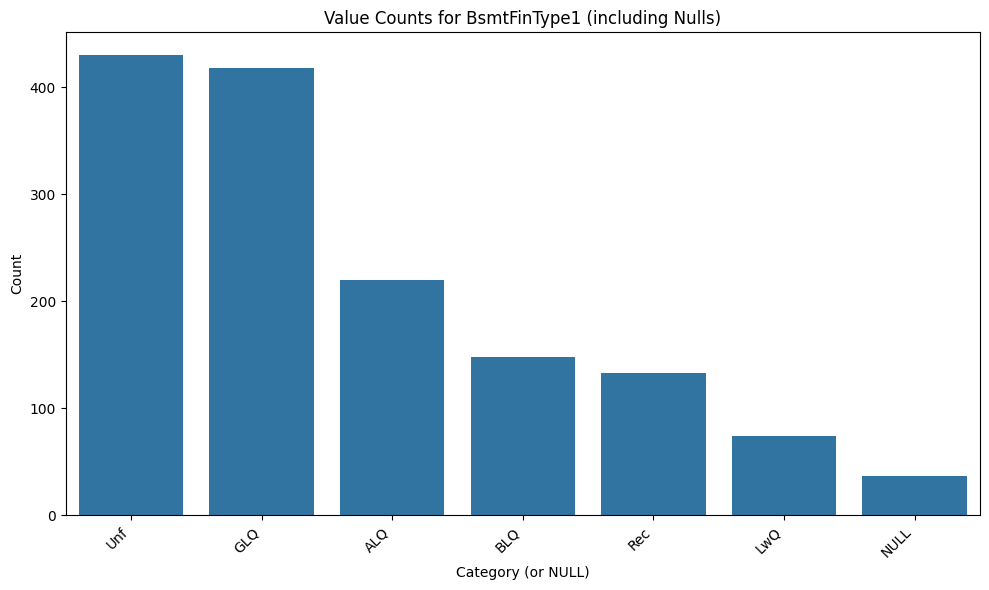

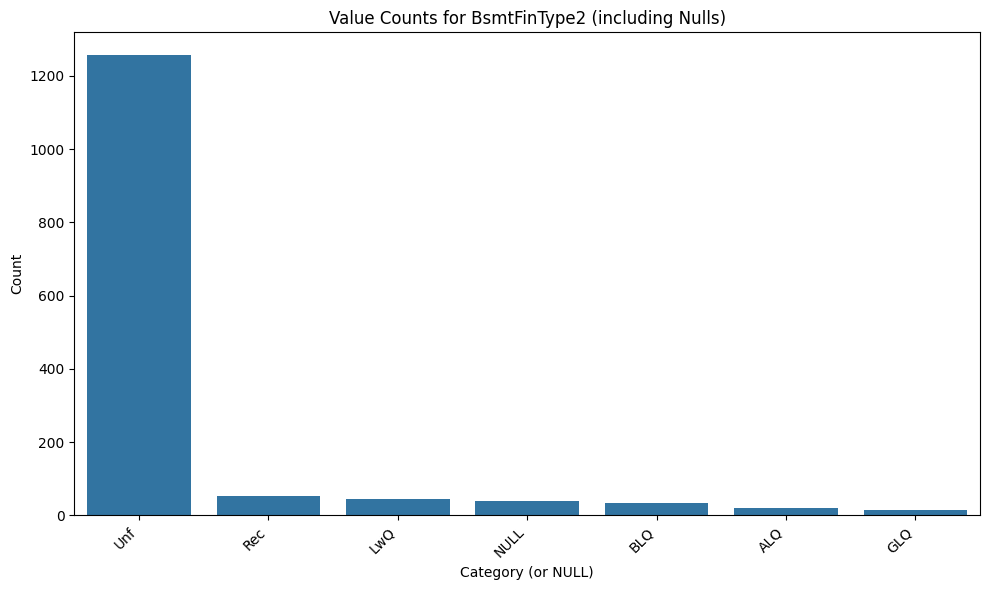

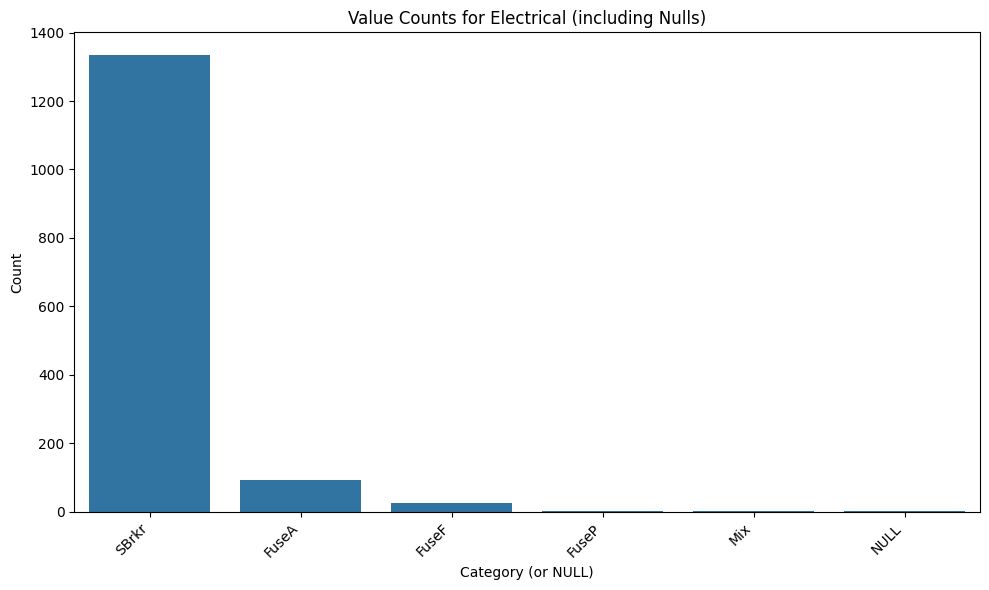

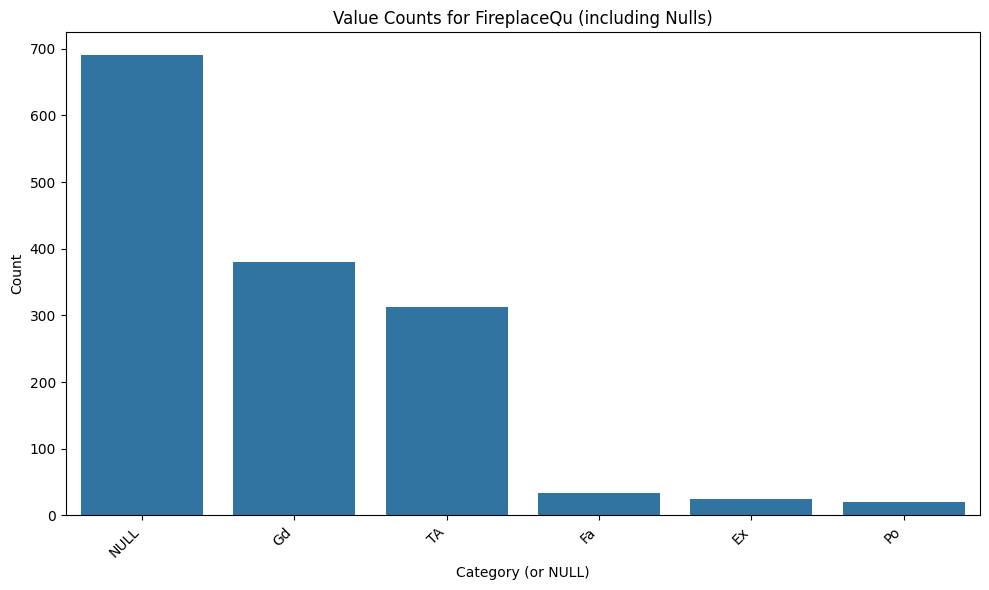

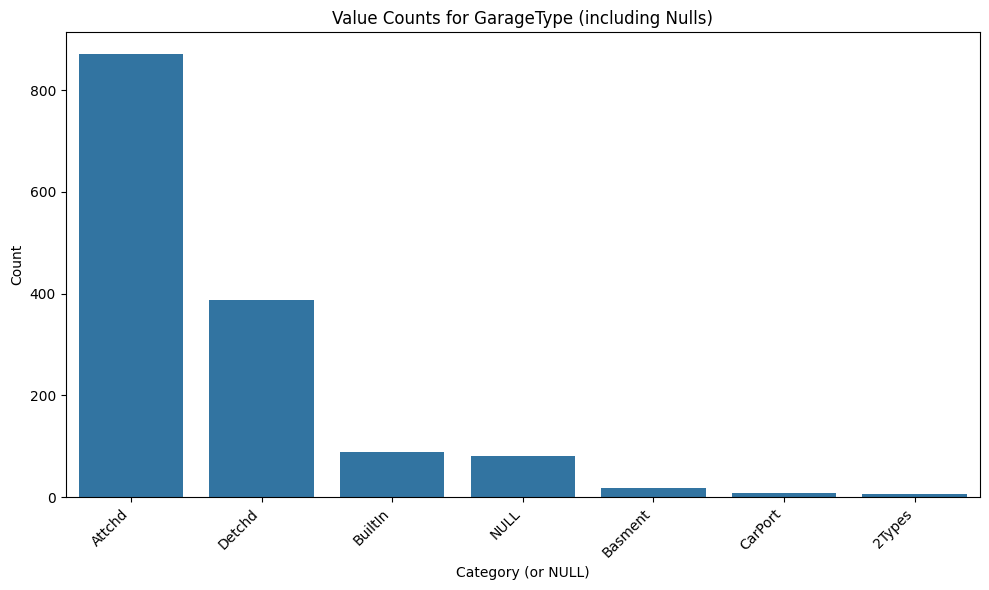

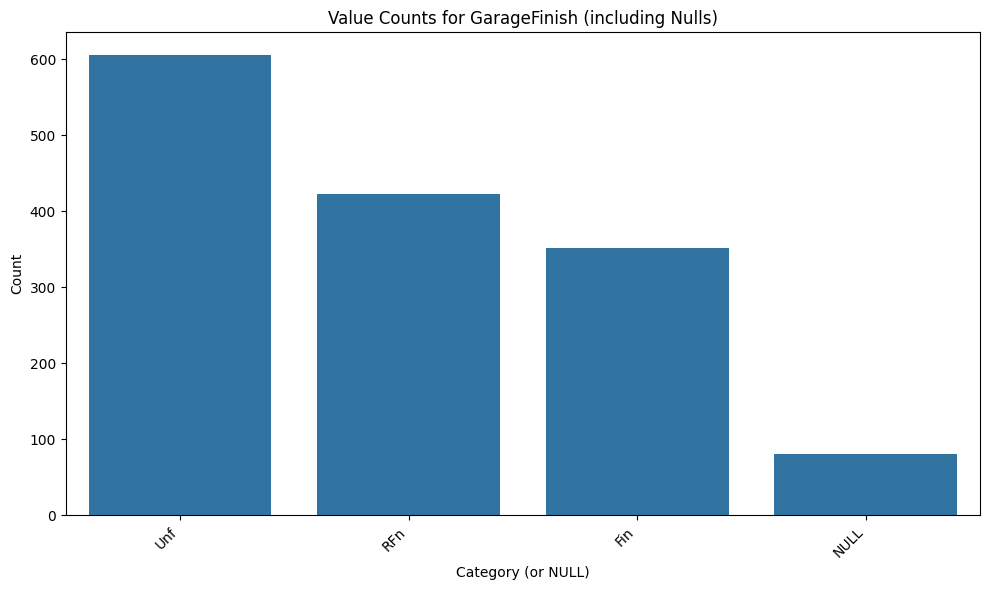

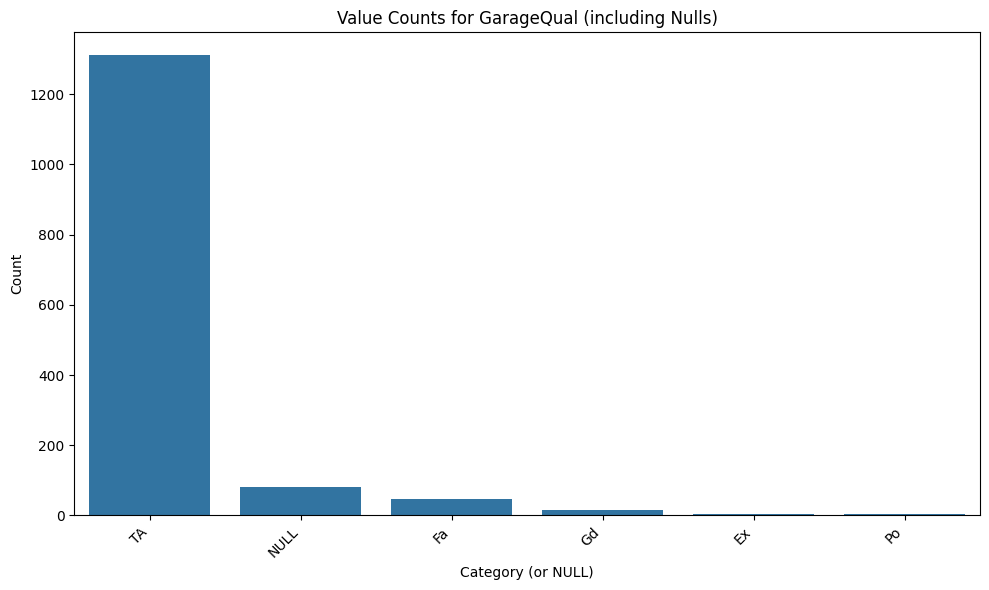

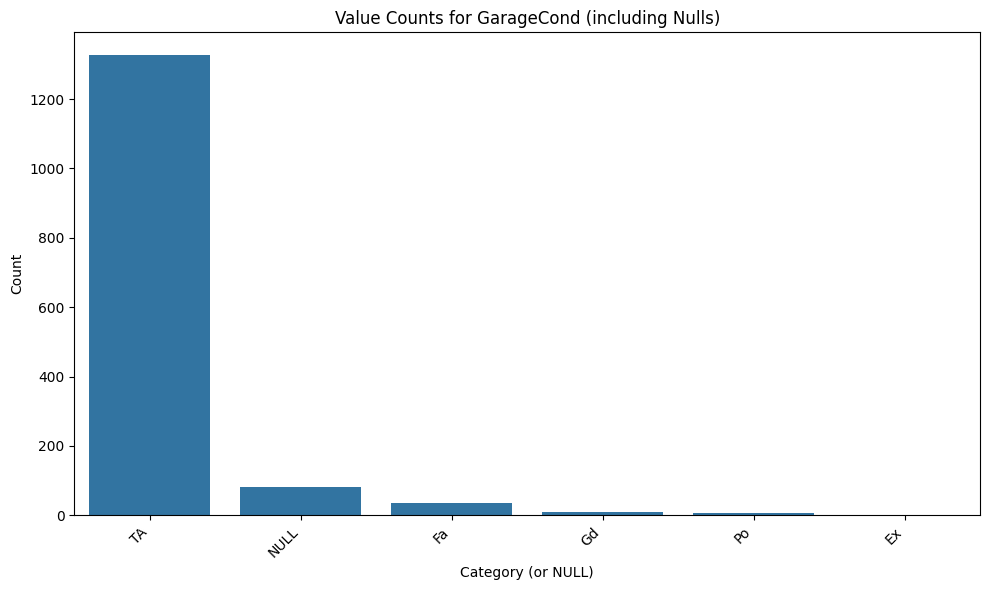

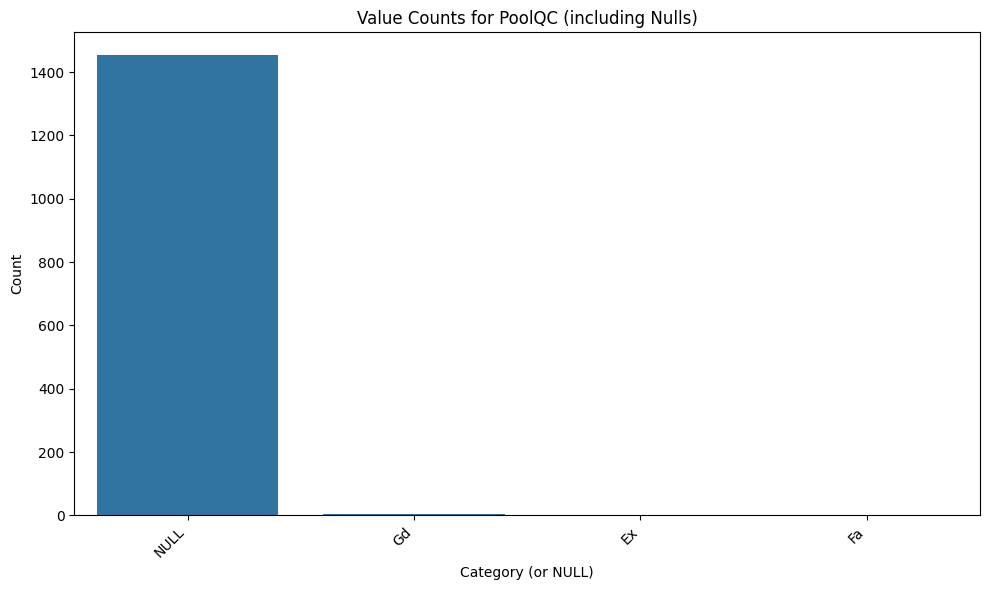

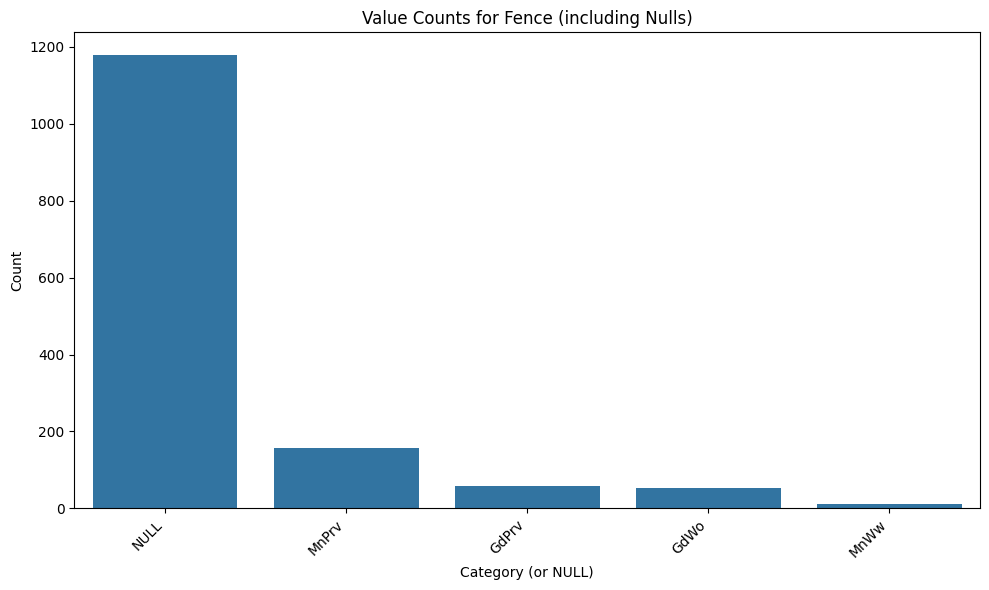

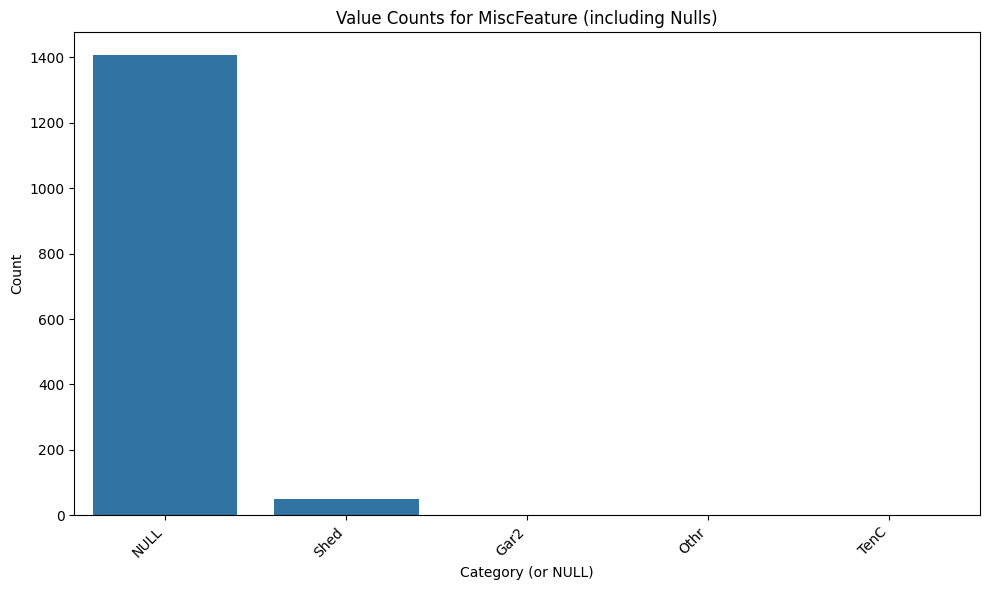

In [11]:
# prompt: for the categorical variables that contains null value draw small bar plots to visualize the number of unique categories and their value counts along with null values count on the x axis

import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns with null values
categorical_with_nulls = [col for col in categorical_features if train_data[col].isnull().sum() > 0]

# Draw bar plots for each categorical column with null values
for col in categorical_with_nulls:
    plt.figure(figsize=(10, 6))
    # Get value counts including nulls
    value_counts_with_nulls = train_data[col].value_counts(dropna=False).reset_index()
    value_counts_with_nulls.columns = [col, 'count']
    # Replace NaN index with a string representation for plotting
    value_counts_with_nulls[col] = value_counts_with_nulls[col].fillna('NULL')

    sns.barplot(x=col, y='count', data=value_counts_with_nulls)
    plt.title(f'Value Counts for {col} (including Nulls)')
    plt.xlabel('Category (or NULL)')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [12]:
# prompt: Drop columns that have null values greater than 800 then replace the null values withe mode value

# Drop columns with more than 800 null values
cols_to_drop = train_data.columns[train_data.isnull().sum() > 800]
train_data = train_data.drop(columns=cols_to_drop)

# Replace remaining null values with the mode for each column
for col in train_data.columns:
  if train_data[col].isnull().sum() > 0:
    mode_value = train_data[col].mode()[0]
    train_data[col] = train_data[col].fillna(mode_value)

# Verify that there are no more null values
print("\nNull values after dropping and filling:")
for col in train_data.columns:
  null_count = train_data[col].isnull().sum()
  print(f"Column: {col}, Null Values: {null_count}")


Null values after dropping and filling:
Column: Id, Null Values: 0
Column: MSSubClass, Null Values: 0
Column: MSZoning, Null Values: 0
Column: LotFrontage, Null Values: 0
Column: LotArea, Null Values: 0
Column: Street, Null Values: 0
Column: LotShape, Null Values: 0
Column: LandContour, Null Values: 0
Column: Utilities, Null Values: 0
Column: LotConfig, Null Values: 0
Column: LandSlope, Null Values: 0
Column: Neighborhood, Null Values: 0
Column: Condition1, Null Values: 0
Column: Condition2, Null Values: 0
Column: BldgType, Null Values: 0
Column: HouseStyle, Null Values: 0
Column: OverallQual, Null Values: 0
Column: OverallCond, Null Values: 0
Column: YearBuilt, Null Values: 0
Column: YearRemodAdd, Null Values: 0
Column: RoofStyle, Null Values: 0
Column: RoofMatl, Null Values: 0
Column: Exterior1st, Null Values: 0
Column: Exterior2nd, Null Values: 0
Column: MasVnrArea, Null Values: 0
Column: ExterQual, Null Values: 0
Column: ExterCond, Null Values: 0
Column: Foundation, Null Values: 0

In [13]:
# prompt: check all columns with null values

# Check for columns with null values
for col in train_data.columns:
  null_count = train_data[col].isnull().sum()
  print(f"Column: {col}, Null Values: {null_count}")

Column: Id, Null Values: 0
Column: MSSubClass, Null Values: 0
Column: MSZoning, Null Values: 0
Column: LotFrontage, Null Values: 0
Column: LotArea, Null Values: 0
Column: Street, Null Values: 0
Column: LotShape, Null Values: 0
Column: LandContour, Null Values: 0
Column: Utilities, Null Values: 0
Column: LotConfig, Null Values: 0
Column: LandSlope, Null Values: 0
Column: Neighborhood, Null Values: 0
Column: Condition1, Null Values: 0
Column: Condition2, Null Values: 0
Column: BldgType, Null Values: 0
Column: HouseStyle, Null Values: 0
Column: OverallQual, Null Values: 0
Column: OverallCond, Null Values: 0
Column: YearBuilt, Null Values: 0
Column: YearRemodAdd, Null Values: 0
Column: RoofStyle, Null Values: 0
Column: RoofMatl, Null Values: 0
Column: Exterior1st, Null Values: 0
Column: Exterior2nd, Null Values: 0
Column: MasVnrArea, Null Values: 0
Column: ExterQual, Null Values: 0
Column: ExterCond, Null Values: 0
Column: Foundation, Null Values: 0
Column: BsmtQual, Null Values: 0
Column:

In [14]:
# prompt: apply one hot encoding on the categorical variables

# Re-identify categorical features after dropping columns
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features, dummy_na=False)


In [15]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
# prompt: take the target variable and place it at the end

target = train_data_encoded['SalePrice']
train_data_encoded = train_data_encoded.drop(columns=['SalePrice'])
train_data_encoded['SalePrice'] = target
train_data=train_data_encoded
train_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,True,False,False,False,False,True,False,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,True,False,False,False,False,True,False,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,True,False,False,False,False,True,False,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,True,True,False,False,False,False,False,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,True,False,False,False,False,True,False,250000


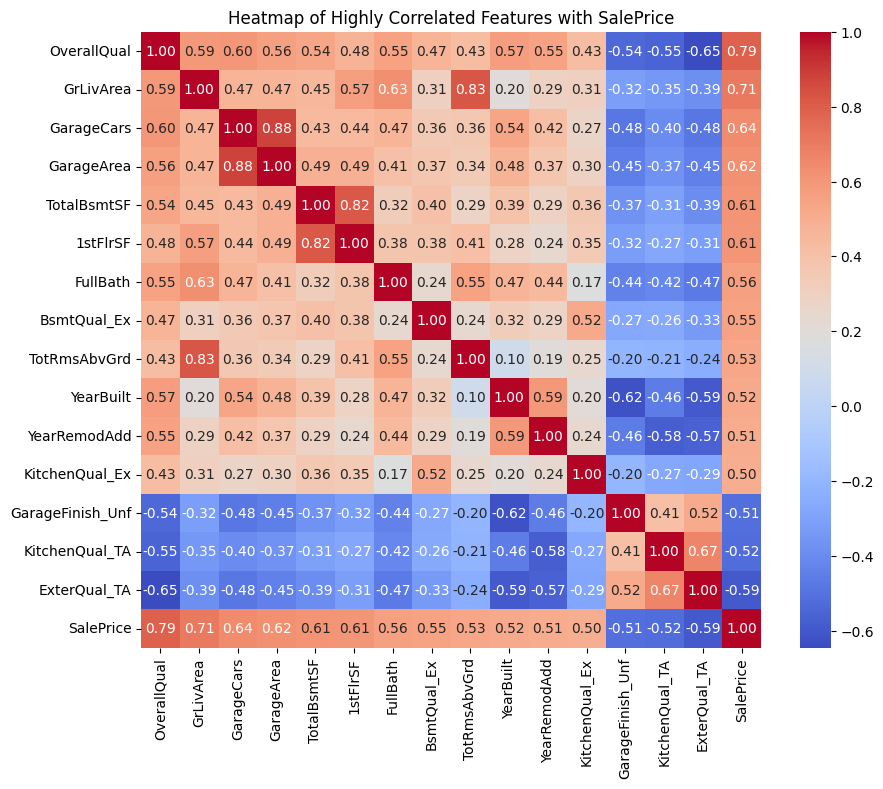

In [17]:
# prompt: # prompt: Create a heat map showing all the features that are highly corelated to the target variable

# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Select correlations with the target variable ('SalePrice')
# and drop the correlation of 'SalePrice' with itself
target_correlation = correlation_matrix['SalePrice'].drop('SalePrice')

# Sort the correlations
target_correlation_sorted = target_correlation.sort_values(ascending=False)

# Set a threshold for high correlation (you can adjust this value)
correlation_threshold = 0.5

# Filter features based on the correlation threshold
highly_correlated_features = target_correlation_sorted[abs(target_correlation_sorted) >= correlation_threshold]

# Create a new dataframe with only the highly correlated features and the target variable
highly_correlated_df = train_data[highly_correlated_features.index.tolist() + ['SalePrice']]

# Calculate the correlation matrix for the highly correlated features
highly_correlated_matrix = highly_correlated_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Highly Correlated Features with SalePrice')
plt.show()

In [18]:
# Separate the 'SalePrice' column
sale_price = train_data['SalePrice']

# Remove the 'Id' and 'SalePrice' columns from train_data
train_data = train_data.drop(['Id', 'SalePrice'], axis=1)


In [19]:
# prompt: apply inplace log transformation in train data for all the cols

# Select only the numerical columns for log transformation
numerical_cols = train_data.select_dtypes(include=np.number).columns.tolist()

# Apply log transformation inplace to numerical columns, adding a small constant to avoid log(0)
for col in numerical_cols:
    # Check if the column contains non-positive values before applying log
    if (train_data[col] <= 0).any():
        print(f"Warning: Column '{col}' contains non-positive values. Skipping log transformation for this column.")
    else:
        train_data[col] = np.log1p(train_data[col])

print("Log transformation applied to numerical columns in train_data inplace.")
train_data.head()

Log transformation applied to numerical columns in train_data inplace.


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


In [20]:
# prompt: apply random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Separate features (X) and target (y)
X = train_data
y = sale_price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
# You can adjust parameters like n_estimators (number of trees), max_depth, etc.
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error on the test set: {mae}')

# You can also make predictions on new data
# For example, to predict the sale price of the first 5 houses in the test set:
# new_data_predictions = model.predict(X_test.head())
# print("\nPredictions for the first 5 test samples:", new_data_predictions)

Mean Absolute Error on the test set: 17386.360034246576


In [21]:
# prompt: apply all the above transformations for test data correctly without error

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
test_data=pd.read_csv('../kaggle/test.csv')

# Drop columns with more than 800 null values (based on training data analysis)
# Ensure the same columns are dropped from test_data as from train_data
cols_to_drop_test = test_data.columns[test_data.isnull().sum() > 800]
test_data = test_data.drop(columns=cols_to_drop_test)

# Replace remaining null values with the mode for each column in test_data
# Use the mode calculated from the training data to avoid data leakage
# Need to load the train_data again to get modes
train_data_for_modes = pd.read_csv('../kaggle/train.csv')
train_data_for_modes = train_data_for_modes.drop(columns=cols_to_drop_test) # Drop the same columns as test_data

for col in test_data.columns:
  if test_data[col].isnull().sum() > 0:
    # Find the mode from the training data for the corresponding column
    if col in train_data_for_modes.columns:
        mode_value = train_data_for_modes[col].mode()[0]
        test_data[col] = test_data[col].fillna(mode_value)
    else:
        # If a column exists in test_data but not in the mode-calculated train_data (due to different dropped columns),
        # use the mode from the test_data itself (less ideal, but necessary if columns differ)
        print(f"Warning: Column '{col}' not found in training data for mode calculation. Using test data mode.")
        mode_value = test_data[col].mode()[0]
        test_data[col] = test_data[col].fillna(mode_value)


# Verify that there are no more null values in test_data
print("\nNull values in test_data after dropping and filling:")
for col in test_data.columns:
  null_count = test_data[col].isnull().sum()
  if(null_count>0):
    print(f"Column: {col}, Null Values: {null_count}")


# Identify categorical features in test_data after dropping columns
categorical_features_test = test_data.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to test_data
# IMPORTANT: Ensure that the resulting columns match the training data's encoded columns
# This is crucial for the model to make predictions
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features_test, dummy_na=False)

# Align columns - This is critical for consistency between train and test data
# Find columns that are in train_data_encoded but not in test_data_encoded
missing_cols_in_test = set(train_data_encoded.columns) - set(test_data_encoded.columns)
# Add missing columns to test_data_encoded and fill with 0
for c in missing_cols_in_test:
    # Exclude the target variable 'SalePrice' if it's in missing_cols_in_test
    if c != 'SalePrice':
        test_data_encoded[c] = 0

# Find columns that are in test_data_encoded but not in train_data_encoded
extra_cols_in_test = set(test_data_encoded.columns) - set(train_data_encoded.columns)
# Drop extra columns from test_data_encoded
test_data_encoded = test_data_encoded.drop(columns=list(extra_cols_in_test))

# Ensure the order of columns is the same as in the training data
# Exclude 'SalePrice' if it's still in train_data_encoded's columns to avoid issues during prediction
train_cols_without_target = [col for col in train_data_encoded.columns if col != 'SalePrice']
test_data_encoded = test_data_encoded[train_cols_without_target]


# Remove the 'Id' column from test_data_encoded if it exists
if 'Id' in test_data_encoded.columns:
    test_data_encoded = test_data_encoded.drop(['Id'], axis=1)


# Select only the numerical columns for log transformation in test_data_encoded
numerical_cols_test = test_data_encoded.select_dtypes(include=np.number).columns.tolist()

# Apply log transformation inplace to numerical columns in test_data_encoded, adding a small constant to avoid log(0)
for col in numerical_cols_test:
    # Check if the column contains non-positive values before applying log
    # if (test_data_encoded[col] <= 0).any():
    #     print(f"Warning: Column '{col}' in test_data_encoded contains non-positive values. Skipping log transformation for this column.")
    # else:
        test_data_encoded[col] = np.log1p(test_data_encoded[col])

print("Log transformation applied to numerical columns in test_data inplace.")

# Now test_data_encoded is ready for prediction using the trained model
# The features in test_data_encoded should match the features (X) used for training




Null values in test_data after dropping and filling:
Log transformation applied to numerical columns in test_data inplace.


In [27]:
# prompt: apply grid search cv then above random forest and evaluate model

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the scorer for Mean Absolute Error
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False) # GridSearchCV maximizes, so we need negative MAE

# Initialize GridSearchCV
# n_jobs=-1 uses all available cores
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring=mae_scorer, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_mae = -grid_search.best_score_ # Convert back to positive MAE

print(f"Best parameters found by GridSearchCV: {best_params}")
print(f"Best cross-validation MAE: {best_mae}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
test_mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print(f"Mean Absolute Error on the test set with tuned model: {test_mae_tuned}")

test_predictions_rf = best_model.predict(test_data_encoded)

# Create the submission file for Random Forest
# Load the original test.csv to get the 'Id' column
test_ids_rf = pd.read_csv('../kaggle/test.csv')['Id']

# Create a DataFrame for the submission
submission_df_rf = pd.DataFrame({'Id': test_ids_rf, 'SalePrice': test_predictions_rf})

# Save the submission file to 'submission_rf.csv'
submission_df_rf.to_csv('submission_rf2.csv', index=False)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found by GridSearchCV: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Best cross-validation MAE: 18244.548730840273
Mean Absolute Error on the test set with tuned model: 17523.530524345442


In [28]:
print(best_model.score(X_test, y_test))

0.8929278128146799


In [25]:
# prompt: apply xgbregressor with grid search cv and create a submission file

!pip install xgboost
from xgboost import XGBRegressor

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Define the parameter grid for GridSearchCV for XGBoost
# This is a starting point, you might want to explore a wider range of parameters
xgb_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize GridSearchCV with XGBoost
# n_jobs=-1 uses all available cores
# cv=5 means 5-fold cross-validation
# scoring='neg_mean_absolute_error' works directly
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid,
                               scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
xgb_best_params = xgb_grid_search.best_params_
xgb_best_mae = -xgb_grid_search.best_score_ # Convert back to positive MAE

print(f"\nBest XGBoost parameters found by GridSearchCV: {xgb_best_params}")
print(f"Best cross-validation MAE for XGBoost: {xgb_best_mae}")

# Evaluate the best XGBoost model on the test set
xgb_best_model = xgb_grid_search.best_estimator_
print(xgb_best_model.score(X_test, y_test))

y_pred_xgb_tuned = xgb_best_model.predict(X_test)
test_mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)

print(f"Mean Absolute Error on the test set with tuned XGBoost model: {test_mae_xgb_tuned}")
print(f"Test R-squared with tuned XGBoost model: {xgb_best_model.score(X_test, y_test)}")


# Make predictions on the actual test data (test_data_encoded) using the best XGBoost model
test_predictions = xgb_best_model.predict(test_data_encoded)

# Create the submission file
# Load the original test.csv to get the 'Id' column
test_ids = pd.read_csv('../kaggle/test.csv')['Id']

# Create a DataFrame for the submission
submission_df = pd.DataFrame({'Id': test_ids, 'SalePrice': test_predictions})

# Save the submission file to 'submission.csv'
submission_df.to_csv('submission_xgb.csv', index=False)

print("\nSubmission file 'submission.csv' created successfully.")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best XGBoost parameters found by GridSearchCV: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Best cross-validation MAE for XGBoost: 15424.54765625
0.9264403581619263
Mean Absolute Error on the test set with tuned XGBoost model: 15040.0205078125
Test R-squared with tuned XGBoost model: 0.9264403581619263

Submission file 'submission.csv' created successfully.


In [29]:
# prompt: apply extra tree regressor here and also create a submission file here

from sklearn.ensemble import ExtraTreesRegressor

# Initialize Extra Trees Regressor
et = ExtraTreesRegressor(random_state=42, n_jobs=-1)

# Define the parameter grid for GridSearchCV for Extra Trees
et_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with Extra Trees
et_grid_search = GridSearchCV(estimator=et, param_grid=et_param_grid,
                              scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
et_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
et_best_params = et_grid_search.best_params_
et_best_mae = -et_grid_search.best_score_ # Convert back to positive MAE

print(f"\nBest Extra Trees parameters found by GridSearchCV: {et_best_params}")
print(f"Best cross-validation MAE for Extra Trees: {et_best_mae}")

# Evaluate the best Extra Trees model on the test set
et_best_model = et_grid_search.best_estimator_
print(et_best_model.score(X_test, y_test))

y_pred_et_tuned = et_best_model.predict(X_test)
test_mae_et_tuned = mean_absolute_error(y_test, y_pred_et_tuned)

print(f"Mean Absolute Error on the test set with tuned Extra Trees model: {test_mae_et_tuned}")
print(f"Test R-squared with tuned Extra Trees model: {et_best_model.score(X_test, y_test)}")

# Make predictions on the actual test data (test_data_encoded) using the best Extra Trees model
test_predictions_et = et_best_model.predict(test_data_encoded)

# Create the submission file for Extra Trees
# Load the original test.csv to get the 'Id' column
test_ids_et = pd.read_csv('../kaggle/test.csv')['Id']

# Create a DataFrame for the submission
submission_df_et = pd.DataFrame({'Id': test_ids_et, 'SalePrice': test_predictions_et})

# Save the submission file to 'submission_et.csv'
submission_df_et.to_csv('submission_et.csv', index=False)

print("\nSubmission file 'submission_et.csv' created successfully.")


Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Extra Trees parameters found by GridSearchCV: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation MAE for Extra Trees: 18489.42195360171
0.8858647358039562
Mean Absolute Error on the test set with tuned Extra Trees model: 17969.229751808518
Test R-squared with tuned Extra Trees model: 0.8858647358039562

Submission file 'submission_et.csv' created successfully.


In [31]:
# prompt: apply SVR

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the data - SVR is sensitive to feature scaling
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
test_data_encoded_scaled = scaler_X.transform(test_data_encoded)

# Scale the target variable
scaler_y = StandardScaler()
# Reshape y_train as fit_transform expects a 2D array
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


# Initialize SVR model
# You can start with a linear kernel and then try 'rbf'
svr = SVR(kernel='linear')

# Define a parameter grid for SVR
# Adjust C, epsilon, and gamma based on kernel
svr_param_grid_linear = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1.0]
}

svr_param_grid_rbf = {
    'C': [1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.5, 1.0],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Choose the kernel and parameter grid
svr_kernel = 'rbf' # or 'linear'
svr = SVR(kernel=svr_kernel)
svr_param_grid = svr_param_grid_rbf if svr_kernel == 'rbf' else svr_param_grid_linear


# Initialize GridSearchCV for SVR
svr_grid_search = GridSearchCV(estimator=svr, param_grid=svr_param_grid,
                               scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the scaled training data
svr_grid_search.fit(X_train_scaled, y_train_scaled)

# Get the best parameters and best score
svr_best_params = svr_grid_search.best_params_
svr_best_mae_scaled = -svr_grid_search.best_score_ # Convert back to positive MAE

print(f"\nBest SVR ({svr_kernel} kernel) parameters found by GridSearchCV: {svr_best_params}")
print(f"Best cross-validation MAE for SVR (scaled target): {svr_best_mae_scaled}")

# Evaluate the best SVR model on the scaled test set
svr_best_model = svr_grid_search.best_estimator_
y_pred_svr_scaled = svr_best_model.predict(X_test_scaled)

# Inverse transform the predictions and actual values to the original scale
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()
test_mae_svr_tuned = mean_absolute_error(y_test, y_pred_svr)


print(f"Mean Absolute Error on the test set with tuned SVR model (original scale): {test_mae_svr_tuned}")

# Make predictions on the actual test data (test_data_encoded_scaled) using the best SVR model
test_predictions_svr_scaled = svr_best_model.predict(test_data_encoded_scaled)

# Inverse transform the predictions to the original scale
test_predictions_svr = scaler_y.inverse_transform(test_predictions_svr_scaled.reshape(-1, 1)).ravel()

# Create the submission file for SVR
# Load the original test.csv to get the 'Id' column
test_ids_svr = pd.read_csv('../kaggle/test.csv')['Id']

# Create a DataFrame for the submission
submission_df_svr = pd.DataFrame({'Id': test_ids_svr, 'SalePrice': test_predictions_svr})

# Save the submission file to 'submission_svr.csv'
submission_df_svr.to_csv('submission_svr.csv', index=False)

print("\nSubmission file 'submission_svr.csv' created successfully.")

Fitting 5 folds for each of 64 candidates, totalling 320 fits

Best SVR (rbf kernel) parameters found by GridSearchCV: {'C': 1, 'epsilon': 0.01, 'gamma': 'auto'}
Best cross-validation MAE for SVR (scaled target): 0.269321091029034
Mean Absolute Error on the test set with tuned SVR model (original scale): 22130.193263822606

Submission file 'submission_svr.csv' created successfully.


In [32]:
# prompt: apply ridge and lasso here

from sklearn.linear_model import Ridge, Lasso

# Initialize Ridge Regression
ridge = Ridge(alpha=1.0) # alpha is the regularization strength

# Initialize Lasso Regression
lasso = Lasso(alpha=1.0) # alpha is the regularization strength

# Train the Ridge model
ridge.fit(X_train_scaled, y_train_scaled) # Use scaled data if you are also using SVR

# Train the Lasso model
lasso.fit(X_train_scaled, y_train_scaled) # Use scaled data if you are also using SVR

# Make predictions with Ridge
y_pred_ridge_scaled = ridge.predict(X_test_scaled)
y_pred_ridge = scaler_y.inverse_transform(y_pred_ridge_scaled.reshape(-1, 1)).ravel()

# Make predictions with Lasso
y_pred_lasso_scaled = lasso.predict(X_test_scaled)
y_pred_lasso = scaler_y.inverse_transform(y_pred_lasso_scaled.reshape(-1, 1)).ravel()

# Evaluate Ridge
test_mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Mean Absolute Error on the test set with Ridge: {test_mae_ridge}")

# Evaluate Lasso
test_mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"Mean Absolute Error on the test set with Lasso: {test_mae_lasso}")

# Optional: Perform GridSearchCV for Ridge and Lasso to find optimal alpha
# Ridge Parameter Grid
ridge_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_grid_search = GridSearchCV(estimator=Ridge(), param_grid=ridge_param_grid,
                                 scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
ridge_grid_search.fit(X_train_scaled, y_train_scaled)
best_ridge_alpha = ridge_grid_search.best_params_['alpha']
best_ridge_mae_scaled = -ridge_grid_search.best_score_
print(f"\nBest Ridge alpha found by GridSearchCV: {best_ridge_alpha}")
print(f"Best cross-validation MAE for Ridge (scaled target): {best_ridge_mae_scaled}")

# Lasso Parameter Grid
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
lasso_grid_search = GridSearchCV(estimator=Lasso(), param_grid=lasso_param_grid,
                                 scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
lasso_grid_search.fit(X_train_scaled, y_train_scaled)
best_lasso_alpha = lasso_grid_search.best_params_['alpha']
best_lasso_mae_scaled = -lasso_grid_search.best_score_
print(f"Best Lasso alpha found by GridSearchCV: {best_lasso_alpha}")
print(f"Best cross-validation MAE for Lasso (scaled target): {best_lasso_mae_scaled}")

# Evaluate best models on the test set
best_ridge_model = Ridge(alpha=best_ridge_alpha)
best_ridge_model.fit(X_train_scaled, y_train_scaled)
y_pred_ridge_tuned_scaled = best_ridge_model.predict(X_test_scaled)
y_pred_ridge_tuned = scaler_y.inverse_transform(y_pred_ridge_tuned_scaled.reshape(-1, 1)).ravel()
test_mae_ridge_tuned = mean_absolute_error(y_test, y_pred_ridge_tuned)
print(f"Mean Absolute Error on the test set with tuned Ridge model (original scale): {test_mae_ridge_tuned}")

best_lasso_model = Lasso(alpha=best_lasso_alpha)
best_lasso_model.fit(X_train_scaled, y_train_scaled)
y_pred_lasso_tuned_scaled = best_lasso_model.predict(X_test_scaled)
y_pred_lasso_tuned = scaler_y.inverse_transform(y_pred_lasso_tuned_scaled.reshape(-1, 1)).ravel()
test_mae_lasso_tuned = mean_absolute_error(y_test, y_pred_lasso_tuned)
print(f"Mean Absolute Error on the test set with tuned Lasso model (original scale): {test_mae_lasso_tuned}")

# Make predictions on the actual test data (test_data_encoded_scaled) using the best models
test_predictions_ridge_scaled = best_ridge_model.predict(test_data_encoded_scaled)
test_predictions_ridge = scaler_y.inverse_transform(test_predictions_ridge_scaled.reshape(-1, 1)).ravel()

test_predictions_lasso_scaled = best_lasso_model.predict(test_data_encoded_scaled)
test_predictions_lasso = scaler_y.inverse_transform(test_predictions_lasso_scaled.reshape(-1, 1)).ravel()

# Create submission files for Ridge and Lasso
test_ids_rl = pd.read_csv('../kaggle/test.csv')['Id']

submission_df_ridge = pd.DataFrame({'Id': test_ids_rl, 'SalePrice': test_predictions_ridge})
submission_df_ridge.to_csv('submission_ridge.csv', index=False)
print("\nSubmission file 'submission_ridge.csv' created successfully.")

submission_df_lasso = pd.DataFrame({'Id': test_ids_rl, 'SalePrice': test_predictions_lasso})
submission_df_lasso.to_csv('submission_lasso.csv', index=False)
print("Submission file 'submission_lasso.csv' created successfully.")


Mean Absolute Error on the test set with Ridge: 18785.030297086607
Mean Absolute Error on the test set with Lasso: 62575.926451960964

Best Ridge alpha found by GridSearchCV: 100.0
Best cross-validation MAE for Ridge (scaled target): 0.23762221199957406
Best Lasso alpha found by GridSearchCV: 0.01
Best cross-validation MAE for Lasso (scaled target): 0.224830530686227
Mean Absolute Error on the test set with tuned Ridge model (original scale): 18702.13120151952
Mean Absolute Error on the test set with tuned Lasso model (original scale): 17315.859421127425

Submission file 'submission_ridge.csv' created successfully.
Submission file 'submission_lasso.csv' created successfully.
